**Module 1: Multilinear Regression &amp; Polynomial Regression**

**Importing libraries that are required for the data Set **

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

**Importing data Set from the drive .**

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Data sets/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

**Missing values check**

In [8]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


**Using one-hot encoding for categorical values ,seprating features and target values.**

In [13]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

**Train test split**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_poly_train, X_poly_test, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)

**Checking shape of test train and test sample.**

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 14), (200, 14), (800,), (200,))

**Applying Standard Scaler.**

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Train or fit model**

In [26]:
from sklearn.linear_model import LinearRegression

***Training multilinear Regression.***

In [36]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

**Evaluating Performance using R2 Score.**

In [34]:
from sklearn.metrics import r2_score

In [37]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.8804


**Model Accuracy.**

In [39]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [40]:
mean_absolute_error(y_test,y_pred)

4.214763142474852

In [41]:
mean_absolute_percentage_error(y_test,y_pred)

84709580252226.64

In [42]:
mean_squared_error(y_test,y_pred)

29.095169866715487

**Visualizing predictions against Actual.**

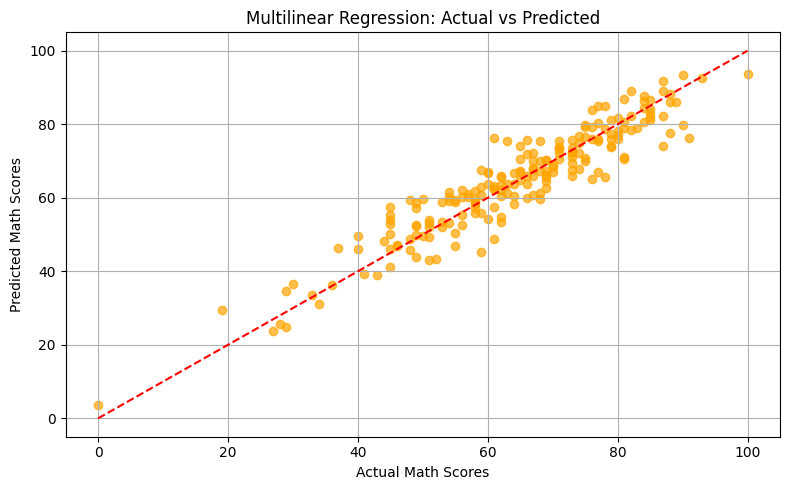

In [46]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Multilinear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()